<h1>Exploring the cuisines of Los Angeles Neighborhoods</h1>

<h3>Coursera - IBM Applied Data Science Capstone Project</h3>

<h4>Table of contents</h4>
<ol>
    <li>Introduction</li>
    <li>Source of Data</li>
    <li>Methodology</li>
    <li>Data Analysis & Machine Learning</li>
    <li>Results</li>
</ol>   

# Introduction and a discussion of the background

<p>Los Angeles City (also simply known as L.A., and nicknamed the "City of Angels") is California's most populous city. The metropolitan area is the second most populated area in the U.S. and home to more than 17 million residents from all over the globe.</p>
<p>Los Angeles is known for its locations and its food. There are many food trucks, hotels, and restaurants that are renowned for their different delicacies. The cuisines of many cultures have taken root and it is filled with restaurants and delicacies that are made only in LA and also served with various dishes. With more restaurants opening every week, L.A. is topping the to-do lists of every food obsessive in America right now.</p>
<p>The aim of this project is to segment L.A's neighbourhoods categorically. In major clusters and test their cuisines. A good purpose is to look at the food preferences and taste of the neighborhood cluster. Further examination could reveal whether food has any relation with the neighborhood's diversity.
This project will help to understand the diversity of a neighborhood by leveraging venue data from Foursquare’s ‘Places API’ and ‘k-means clustering’ machine learning algorithm. Exploratory Data Analysis (EDA) will help to discover further about the culture and diversity of the neighborhood.</p>

# Target Audience

<ul>
<li>Stakeholders will be the one involved in using this quantifiable research to consider how various cultures and cuisines are spread over LA. Also, a new food vendor willing to open his or her restaurant can make use of this project. Or by a government authority to better examine and study the diversity of their city's culture.</li>
<li>Business Analyst or Data Scientists who want to analyze LA's neighborhoods using Exploratory Data Analysis and other statistical & machine learning techniques to obtain all the data they need, perform some operations on it and finally be able to tell a story from it.</li>

# Source of the Data

<ol>
    <li>Zillow <p>Link - <a href='https://www.zillow.com/research/data/'>https://www.zillow.com/research/data/</a><br>
                  A complete list of neighborhoods of Los Angeles was downloaded in CSV format from Zillow Housing Data.</p></li>
    <li>Foursqure API <p>Link - <a href='https://developer.foursquare.com/docs'>https://developer.foursquare.com/docs</a><br>
                          To get location and other information about various Food venues in LA I’m using Foursquare’s explore API. Using the Foursquare’s venue API with mentioned category (which gives venues recommendations), I’m fetching details about the food venues up present in LA and collected their names, categories and locations (latitude and longitude).</p><br>
From Foursquare API (), I retrieved the following for each venue:        
        <ul> 
            <li>Name - The name of the venue.</li>
            <li>Category - The category type as defined by the API.</li>
            <li>Latitude - The latitude value of the venue.</li>
            <li>Longitude - The longitude value of the venue</li>
        </ul>
    </li>
</ol>

# Methodology
Import required packages and modules

In [1]:
#Import folium for geographical representation
!pip install folium

     |████████████████████████████████| 102kB 6.9MB/s ta 0:00:011


In [2]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

# import wget
import os


import json # library to handle JSON files
from pprint import pprint # data pretty printer

import requests # library to handle requests
from bs4 import BeautifulSoup  # library to handle web scraping

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import folium # map rendering library

import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors # Matplotlib and associated plotting modules
import matplotlib.pyplot as plt

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from collections import Counter # count occurrences 

from sklearn.cluster import KMeans # import k-means from clustering stage

<h3> Importing data set</h3><br>
Here we use downloaded LA Neighborhoods data from Zillow.<br>
Below section is the code snippet generated by IBM for importing files from Watson Studio<br>
File - la-neighborhoods.xlsx <br>
Using pandas it is converted to DataFrame 

In [3]:
# The code was removed by Watson Studio for sharing.

,Neighborhood
0,South Los Angeles
1,Southeast Los Angeles
2,Hollywood
3,Mid City
4,Van Nuys


Lets explore the shape of the data

In [22]:
la_neighborhoods.shape

(95, 3)

Use <i><b>geopy's nominatum</b></i> library to find latitude & longitude for the given location

In [4]:
#Finding coordinates of Los Angeles city using geolocator
address = 'Los Angeles City, California'
location = None

# define an instance of the geocoder -> foursquare_agent
while location == None:
    try:
        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
    except:
        pass
print('The geograpical coordinate of Los Angelse City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angelse City are 34.0536909, -118.2427666.


<b>Now we generate latitude & longitude for each and every neighborhoods of LA by iterating the neighborhood values from dataframe</b>

In [5]:
#Finding coordinates of Los Angelse city Neighborhoods using geolocator
latitude_list = []
longitude_list = []

for neighborhood in la_neighborhoods['Neighborhood']:
    address = neighborhood+', Los Angeles, CA'
    location = None

    # define an instance of the geocoder -> foursquare_agent        
    while location == None:
        
        try:            
            geolocator = Nominatim(user_agent="foursquare_agent")
            location = geolocator.geocode(address)
            latitude_list.append(location.latitude)
            longitude_list.append(location.longitude)
            
        except:
            print(address)
            
print("Length of Latitude list ", len(latitude_list))
print("Length of Longitude list ", len(longitude_list))

Central, Los Angeles, CA
Central, Los Angeles, CA
Length of Latitude list  95
Length of Longitude list  95


<b>Now that we've fetched latitude and longitude of each and every neighborhoods. Let's create new columns to datframe and append values</b>

In [6]:
la_neighborhoods['Latitude'] = latitude_list
la_neighborhoods['Longitude'] = longitude_list

In [7]:
la_neighborhoods.head()

,Neighborhood,Latitude,Longitude
0,South Los Angeles,33.928291,-118.278813
1,Southeast Los Angeles,34.053691,-118.242767
2,Hollywood,34.098003,-118.329523
3,Mid City,34.041527,-118.360370
4,Van Nuys,34.186619,-118.448667


<b>Create a map to visualize all neighborhoods of LA</b>

In [8]:
def create_folium_map(df, latitude, longitude):
    loc_map = folium.Map(location = [latitude, longitude], zoom_start=10)

    for lat, lon, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
        label = '{}'.format(neighborhood)
        label = folium.Popup(label, parse_html = True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup = label,
            color='black',
            fill=True,
            fill_color='#1c1c1c',
            fill_opacity=0.7,
            parse_html=False).add_to(loc_map) 

    return(loc_map)

In [9]:
la_map = create_folium_map(la_neighborhoods, latitude, longitude)
la_map

<b>Foursquare API credentials and version</b><br>
We utilize Foursquare API features to explore the FOOD category in every neighborhood

In [11]:
CLIENT_ID = 'OEVQYGFMA22NPP0GVV4TEGS4CDNU2UWJXZK1FV2YV4ZLKKLH' # your Foursquare ID
CLIENT_SECRET = 'YEZ4GJ2OBG1ODWZ1PQ53EAMUTZFXHKM45ORK5OGEMOVV5PQ2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OEVQYGFMA22NPP0GVV4TEGS4CDNU2UWJXZK1FV2YV4ZLKKLH
CLIENT_SECRET:YEZ4GJ2OBG1ODWZ1PQ53EAMUTZFXHKM45ORK5OGEMOVV5PQ2


<b>Foursquare APIs 'venue' call to explore available categories</b>

In [12]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

In [14]:
for i in range(len(category_results['response']['categories'])):
    print('_____________________________')
    print(category_results['response']['categories'][i]['name'])
    for key, value in category_results['response']['categories'][i].items(): 
        if key == 'categories':
            print(key, len((value)))

_____________________________
Arts & Entertainment
categories 36
_____________________________
College & University
categories 23
_____________________________
Event
categories 12
_____________________________
Food
categories 92
_____________________________
Nightlife Spot
categories 7
_____________________________
Outdoors & Recreation
categories 62
_____________________________
Professional & Other Places
categories 43
_____________________________
Residence
categories 5
_____________________________
Shop & Service
categories 145
_____________________________
Travel & Transport
categories 34


<b>Now let's explore the Foursquare API response format for FOOD category by giving sample location details</b>

In [15]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
categoryId = '4d4b7105d754a06374d81259' # category ID for "Food"

neighborhood_latitude = 33.928291
neighborhood_longitude = -118.278813

# create URL

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    categoryId,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/search?&client_id=OEVQYGFMA22NPP0GVV4TEGS4CDNU2UWJXZK1FV2YV4ZLKKLH&client_secret=YEZ4GJ2OBG1ODWZ1PQ53EAMUTZFXHKM45ORK5OGEMOVV5PQ2&v=20180605&ll=33.928291,-118.278813&radius=1000&categoryId=4d4b7105d754a06374d81259&limit=500'

In [16]:
results = requests.get(url).json()
len(results['response']['venues'])

34

In [18]:
results['response']['venues'][0]

{'id': '4b8736bef964a520c4b631e3',
 'name': 'Jack in the Box',
 'location': {'address': '11400 S Figueroa St',
  'lat': 33.93072024913725,
  'lng': -118.28219890594482,
  'labeledLatLngs': [{'label': 'display',
    'lat': 33.93072024913725,
    'lng': -118.28219890594482},
   {'label': 'entrance', 'lat': 33.93078, 'lng': -118.282333}],
  'distance': 413,
  'postalCode': '90061',
  'cc': 'US',
  'city': 'Los Angeles',
  'state': 'CA',
  'country': 'United States',
  'formattedAddress': ['11400 S Figueroa St',
   'Los Angeles, CA 90061',
   'United States']},
 'categories': [{'id': '4bf58dd8d48988d16e941735',
   'name': 'Fast Food Restaurant',
   'pluralName': 'Fast Food Restaurants',
   'shortName': 'Fast Food',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
    'suffix': '.png'},
   'primary': True}],
 'referralId': 'v-1592069339',
 'hasPerk': False}

<b>Now that you can see the venue key contains list of venue objects</b> <br><br>
Each object contains:
<ul>
    <li>Venue Name</li>
    <li>Venue Location (Latitude & Longitude)</li>
    <li>Venue Category</li>   
</ul>

<b>Now lets repeat this process for each and every Neighborhood of LA to get FOOD venues within 5 miles range and with a limit of 1000 venues</b>

In [20]:
def getNearbyFood(names, latitudes, longitudes, radius=8046, LIMIT=1000):
    not_found = 0
    CLIENT_ID = 'OEVQYGFMA22NPP0GVV4TEGS4CDNU2UWJXZK1FV2YV4ZLKKLH' # your Foursquare ID
    CLIENT_SECRET = 'YEZ4GJ2OBG1ODWZ1PQ53EAMUTZFXHKM45ORK5OGEMOVV5PQ2'
    VERSION = '20180605' # Foursquare API version
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):          
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)

Below code execution might take some time because of iteration of Foursquare API calls

In [21]:
la_venues_df = getNearbyFood(names=la_neighborhoods['Neighborhood'],
                                        latitudes=la_neighborhoods['Latitude'],
                                        longitudes=la_neighborhoods['Longitude']
                                       )


Done with 0 venues with incompelete information.


# 3. Data Analysis and Machine Learning

Let's check the shape and head of the data

In [23]:
print(la_venues_df.shape)
la_venues_df.head()

(4750, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,South Los Angeles,33.928291,-118.278813,Carl's Jr.,33.902674,-118.351993,Fast Food Restaurant
1,South Los Angeles,33.928291,-118.278813,McDonald's,33.902275,-118.335027,Fast Food Restaurant
2,South Los Angeles,33.928291,-118.278813,Taco Bell,33.901042,-118.344162,Fast Food Restaurant
3,South Los Angeles,33.928291,-118.278813,Pancho's Tacos,33.900806,-118.344128,Food
4,South Los Angeles,33.928291,-118.278813,Gardena Bowl Coffee Shop,33.888297,-118.292083,Café


<b>Let's find out how many unique categories can be curated from all the returned venues</b>

In [39]:
print('There are {} uniques categories.'.format(len(la_venues_df['Venue Category'].unique())))
la_venues_df.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 86 uniques categories.


Venue Category
Coffee Shop                        1199
Fast Food Restaurant                920
Donut Shop                          191
Bakery                              182
Café                                167
Burger Joint                        160
Supermarket                         142
Convenience Store                   112
Fried Chicken Joint                  88
Mexican Restaurant                   84
Ice Cream Shop                       75
Bubble Tea Shop                      67
Sandwich Place                       67
Food Court                           66
Seafood Restaurant                   51
American Restaurant                  49
Vegetarian / Vegan Restaurant        46
Japanese Restaurant                  46
Food Truck                           43
Deli / Bodega                        40
Juice Bar                            35
Mediterranean Restaurant             35
Grocery Store                        35
Breakfast Spot                       34
Farmers Market           

Now lets explore different venue categories and remove general coffee shops and cafe. We are doing this because the goal of this project is to find the diversity of food of all neighborhoods of LA

In [24]:
unique_categories = la_venues_df['Venue Category'].unique().tolist()
print(', '.join(str(x) for x in unique_categories))

Fast Food Restaurant, Food, Café, Burger Joint, Fried Chicken Joint, Coffee Shop, Grocery Store, Deli / Bodega, Mexican Restaurant, Convenience Store, Southern / Soul Food Restaurant, Bakery, Sandwich Place, Donut Shop, Hawaiian Restaurant, Bubble Tea Shop, Ice Cream Shop, Frozen Yogurt Shop, African Restaurant, Seafood Restaurant, Japanese Restaurant, Ramen Restaurant, Food Court, Indian Restaurant, Vegetarian / Vegan Restaurant, Food Truck, Shopping Mall, Breakfast Spot, Market, Supermarket, Brewery, Sake Bar, Thai Restaurant, Taco Place, Diner, Salad Place, Greek Restaurant, Cuban Restaurant, Juice Bar, Farmers Market, Sushi Restaurant, Cafeteria, Gourmet Shop, Creperie, Mediterranean Restaurant, Italian Restaurant, Gas Station, American Restaurant, BBQ Joint, Poke Place, Noodle House, Dessert Shop, Smoothie Shop, Food Service, Chinese Restaurant, Restaurant, Middle Eastern Restaurant, Bagel Shop, Hot Dog Joint, Steakhouse, Pizza Place, Tex-Mex Restaurant, Asian Restaurant, Filipino

In [25]:
len(unique_categories)

86

Remove generalized categories manually

In [26]:
# manually create a list of generalized categories
general_categories = ['Dessert Shop','Food','Ice Cream Shop','Donut Shop','Bakery','Sandwich Place','Comfort Food Restaurant',
                    'Deli / Bodega','Food Truck','Bagel Shop','Burger Joint','Restaurant','Frozen Yogurt Shop','Coffee Shop',
                    'Diner','Wings Joint','Café','Juice Bar','Breakfast Spot','Grocery Store','Bar','Cupcake Shop',
                    'Pub','Fish & Chips Shop','Cafeteria','Other Nightlife','Arcade','Hot Dog Joint','Food Court',
                    'Health Food Store','Convenience Store','Food & Drink Shop','Cocktail Bar','Cheese Shop',
                    'Snack Place','Sports Bar','Lounge','Theme Restaurant','Buffet','Bubble Tea Shop','Building',
                    'Irish Pub','College Cafeteria','Tea Room','Supermarket','Hotpot Restaurant','Gastropub','Beer Garden',
                    'Fish Market','Beer Bar','Clothing Store','Music Venue','Bistro','Salad Place','Wine Bar','Gourmet Shop',
                    'Indie Movie Theater','Art Gallery','Gift Shop','Pie Shop','Fruit & Vegetable Store',
                    'Street Food Gathering','Dive Bar','Factory','Farmers Market','Mac & Cheese Joint','Creperie',
                    'Candy Store','Event Space','Skating Rink','Miscellaneous Shop','Gas Station','Organic Grocery',
                    'Pastry Shop','Club House','Flea Market','Hotel','Furniture / Home Store','Bookstore','Pet Café',
                    'Gym / Fitness Center','Flower Shop','Financial or Legal Service','Hotel Bar','Hookah Bar','Poke Place',
                    'Market','Gluten-free Restaurant','Smoothie Shop','Butcher','Food Stand','Beach Bar','Beach',
                    'Soup Place','Rock Club','Residential Building (Apartment / Condo)','Laundry Service',
                    'Government Building','Bowling Alley','Nightclub','Park','Moving Target']

In [27]:
# fetch all the required food categories
food_categories =  list(set(unique_categories) - set(general_categories))
print(', '.join(str(x) for x in food_categories))

Afghan Restaurant, Liquor Store, American Restaurant, Ramen Restaurant, Mexican Restaurant, Taco Place, New American Restaurant, Steakhouse, Brewery, Food Service, Japanese Restaurant, Pizza Place, Southern / Soul Food Restaurant, Italian Restaurant, Shabu-Shabu Restaurant, Fried Chicken Joint, Taiwanese Restaurant, Seafood Restaurant, Vegetarian / Vegan Restaurant, Noodle House, Middle Eastern Restaurant, Udon Restaurant, Donburi Restaurant, Falafel Restaurant, Mediterranean Restaurant, Greek Restaurant, Plaza, English Restaurant, Shopping Mall, Temple, Australian Restaurant, Cuban Restaurant, Korean Restaurant, Fast Food Restaurant, Dumpling Restaurant, Thai Restaurant, African Restaurant, French Restaurant, Chinese Restaurant, Sushi Restaurant, Filipino Restaurant, Asian Restaurant, Tex-Mex Restaurant, Kebab Restaurant, Sake Bar, Hawaiian Restaurant, BBQ Joint, Dim Sum Restaurant, Vietnamese Restaurant, Indian Restaurant


Lets find out the count of the result categories

In [28]:
len(food_categories)

50

<b>Create new columns with all required fields</b>

In [29]:
la_venues_df = la_venues_df[la_venues_df['Venue Category'].isin(food_categories)].reset_index()
la_venues_df.head(5)

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,South Los Angeles,33.928291,-118.278813,Carl's Jr.,33.902674,-118.351993,Fast Food Restaurant
1,1,South Los Angeles,33.928291,-118.278813,McDonald's,33.902275,-118.335027,Fast Food Restaurant
2,2,South Los Angeles,33.928291,-118.278813,Taco Bell,33.901042,-118.344162,Fast Food Restaurant
3,6,South Los Angeles,33.928291,-118.278813,Popeyes Louisiana Kitchen,33.976057,-118.357958,Fried Chicken Joint
4,10,South Los Angeles,33.928291,-118.278813,Chipotle Mexican Grill,34.016956,-118.282584,Mexican Restaurant


In [30]:
la_venues_df.shape

(1818, 8)

In [31]:
print('There are {} unique FOOD categories.'.format(len(la_venues_df['Venue Category'].unique())))

There are 50 unique FOOD categories.


In [32]:
print('There are {} uniques venues.'.format(len(la_venues_df['Venue'])))

There are 1818 uniques venues.


<b>Analyze each neighborhood by creating doing one hot encoding</b>

In [33]:
# one hot encoding
la_dummies_df = pd.get_dummies(la_venues_df[['Venue Category']], prefix="", prefix_sep="")
la_dummies_df.insert(0, 'Neighborhood', la_venues_df['Neighborhood'])
la_dummies_df.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Brewery,Chinese Restaurant,Cuban Restaurant,...,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Temple,Tex-Mex Restaurant,Thai Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,South Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,South Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,South Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,South Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,South Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
la_dummies_df.shape

(1818, 51)

<b>Let's group the values bt neighborhood so that we can count all the venues for each cateogry</b>

In [35]:
venue_counts = la_dummies_df.groupby('Neighborhood').sum()
venue_counts.head(5)

,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Brewery,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,...,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Temple,Tex-Mex Restaurant,Thai Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Adams-Normandie,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,2,0
Arleta,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
Arlington Heights,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Atwater Village,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
Bel Air,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
venue_counts.shape

(95, 50)

Aggregate it by MEAN

In [38]:
la_neighborhood_mean = la_dummies_df.groupby('Neighborhood').mean().reset_index()
la_neighborhood_mean.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Brewery,Chinese Restaurant,Cuban Restaurant,...,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Temple,Tex-Mex Restaurant,Thai Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Adams-Normandie,0.0,0.0,0.000000,0.0,0.0,0.000000,0.052632,0.000000,0.0,...,0.0,0.000000,0.052632,0.0,0.000000,0.0,0.0,0.000000,0.105263,0.000000
1,Arleta,0.0,0.0,0.000000,0.0,0.0,0.043478,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.043478,0.0,0.0,0.000000,0.000000,0.043478
2,Arlington Heights,0.0,0.0,0.000000,0.0,0.0,0.000000,0.062500,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.062500,0.000000
3,Atwater Village,0.0,0.0,0.000000,0.0,0.0,0.000000,0.058824,0.000000,0.0,...,0.0,0.058824,0.058824,0.0,0.000000,0.0,0.0,0.000000,0.058824,0.000000
4,Bel Air,0.0,0.0,0.055556,0.0,0.0,0.000000,0.000000,0.055556,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.055556,0.000000,0.000000


Lets find top 9 categories for every neighborhood 

In [39]:
def return_top_9_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [41]:
num_top_venues = 9

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))    

In [42]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = la_neighborhood_mean['Neighborhood']

In [43]:
for ind in np.arange(la_neighborhood_mean.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_top_9_venues(la_neighborhood_mean.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,Adams-Normandie,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Seafood Restaurant,Taco Place,Brewery,Southern / Soul Food Restaurant,Shopping Mall,Dumpling Restaurant
1,Arleta,Fast Food Restaurant,Mexican Restaurant,Vietnamese Restaurant,Falafel Restaurant,Fried Chicken Joint,Middle Eastern Restaurant,Noodle House,Pizza Place,Italian Restaurant
2,Arlington Heights,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Brewery,Shopping Mall,Japanese Restaurant,Falafel Restaurant,Italian Restaurant,Indian Restaurant
3,Atwater Village,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Greek Restaurant,Taco Place,Sushi Restaurant,Brewery,Shopping Mall,Vietnamese Restaurant
4,Bel Air,Fast Food Restaurant,Udon Restaurant,Japanese Restaurant,American Restaurant,Greek Restaurant,Fried Chicken Joint,Mediterranean Restaurant,Chinese Restaurant,Mexican Restaurant


# Clustering

We will use K-Means clustering for neighborhood clustering of LA

In [44]:
la_clustering = la_neighborhood_mean.drop('Neighborhood', 1)

<b>Lets find optimal K value for clustering using Silhouette method</b>

In [45]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,30)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(la_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(la_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

<b>Plot the cluster with the K values</b>

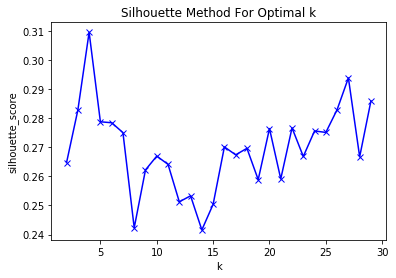

In [46]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

<b>Since there is a peak at K=4, lets set the optimized K values to 4</b>

In [47]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(la_clustering)

print(Counter(kmeans.labels_))

Counter({0: 35, 2: 28, 1: 26, 3: 6})


Add cluster labels to DataFrame

In [48]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [49]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,1,Adams-Normandie,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Seafood Restaurant,Taco Place,Brewery,Southern / Soul Food Restaurant,Shopping Mall,Dumpling Restaurant
1,2,Arleta,Fast Food Restaurant,Mexican Restaurant,Vietnamese Restaurant,Falafel Restaurant,Fried Chicken Joint,Middle Eastern Restaurant,Noodle House,Pizza Place,Italian Restaurant
2,0,Arlington Heights,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Brewery,Shopping Mall,Japanese Restaurant,Falafel Restaurant,Italian Restaurant,Indian Restaurant
3,1,Atwater Village,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Greek Restaurant,Taco Place,Sushi Restaurant,Brewery,Shopping Mall,Vietnamese Restaurant
4,2,Bel Air,Fast Food Restaurant,Udon Restaurant,Japanese Restaurant,American Restaurant,Greek Restaurant,Fried Chicken Joint,Mediterranean Restaurant,Chinese Restaurant,Mexican Restaurant


In [51]:
# merge neighborhoods_venues_sorted with LA data to add latitude/longitude for each neighborhood
la_final_df = neighborhoods_venues_sorted.join(la_neighborhoods.set_index('Neighborhood'), on='Neighborhood')
la_final_df.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,Latitude,Longitude
0,1,Adams-Normandie,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Seafood Restaurant,Taco Place,Brewery,Southern / Soul Food Restaurant,Shopping Mall,Dumpling Restaurant,34.031788,-118.300247
1,2,Arleta,Fast Food Restaurant,Mexican Restaurant,Vietnamese Restaurant,Falafel Restaurant,Fried Chicken Joint,Middle Eastern Restaurant,Noodle House,Pizza Place,Italian Restaurant,34.241327,-118.432205
2,0,Arlington Heights,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Brewery,Shopping Mall,Japanese Restaurant,Falafel Restaurant,Italian Restaurant,Indian Restaurant,34.043494,-118.321374
3,1,Atwater Village,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Greek Restaurant,Taco Place,Sushi Restaurant,Brewery,Shopping Mall,Vietnamese Restaurant,34.118698,-118.262392
4,2,Bel Air,Fast Food Restaurant,Udon Restaurant,Japanese Restaurant,American Restaurant,Greek Restaurant,Fried Chicken Joint,Mediterranean Restaurant,Chinese Restaurant,Mexican Restaurant,34.098883,-118.459881


<b>Visualize clusters of LA Neighborhoods</b>

In [52]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]

colors_array = cm.rainbow(np.linspace(0, 1, len(ys)+3))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(la_final_df['Latitude'], la_final_df['Longitude'], la_final_df['Neighborhood'], la_final_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters